In [51]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [155]:
#!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.2.2-cp310-cp310-macosx_11_0_arm64.whl size=152827 sha256=a3b455e056f46b7ae910166d67ad79898a663219c294238f8016d6368a5188fb
  Stored in directory: /Users/silasgifford/Library/Caches/pip/wheels/9b/fe/91/c3a2166a21f3f9515fa4660b498a9f69223847a8323f58556b
Successfully built wordcloud


In [156]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

## Load in the Data

Note: Due to push shift changing servers, we are only able to access data after Nov 2022. [Source](https://www.reddit.com/r/pushshift/comments/zkggt0/update_on_colo_switchover_bug_fixes_reindexing/)

In [7]:
feb = pd.read_csv('feb_data.csv')
feb.drop('Unnamed: 0', axis=1, inplace = True)

In [21]:
twenty22 = pd.read_csv('2022_data.csv')
twenty22.drop('Unnamed: 0', axis=1, inplace = True)
twenty22.rename({'selftext': 'body'}, axis = 1, inplace = True)

In [43]:
data = pd.concat([twenty22, feb], axis=0)
data = data.reset_index(drop = True)
#data.drop('index', axis=1, inplace = True)

## Examples from the Data

In [180]:
print(data.loc[300]['title'], data.loc[300]['body'])

I went to go pick up my friend at his house when I picked him up he got in the car and we started driving. My friend ended up calling me a minute after we left his house he asked me where I was at.


In [201]:
print(data.loc[151]['title'], data.loc[151]['body'])

I caught myself singing "It's Friday, it's Friday, I wish every day were Friiidaaay,"... ... but not soon enough to stop my wish from coming true.


In [200]:
print(data.loc[9658]['title'], data.loc[9658]['body'])

I took my parachute and jumped It was not a parachute


In [179]:
print(data.loc[1]['title'], data.loc[1]['body'])

You, a tornado chaser, are looking at a tornado that is moving away from you. Then suddenly, it reverses direction.


In [206]:
print(data.loc[9760]['title'], data.loc[9760]['body'])

I went to the bathroom to do my business Then i woke up


## Examine the sentence lengths

In [53]:
titleLen = data['title'].str.split(' ').apply(len)
#titleLen
print('The longest title is', max(titleLen))
print('The shortest title is', min(titleLen))
print('The average title is', round(np.mean(titleLen), 2))

The longest title is 60
The shortest title is 1
The average title is 15.66


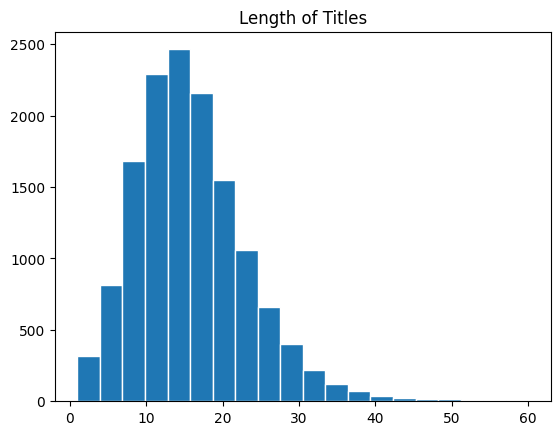

In [61]:
plt.hist(titleLen, bins=20, ec='w')
plt.title("Length of Titles")
plt.show()

In [102]:
bodyLen = data['body'].dropna().str.split(' ').apply(len)
#bodyLen
print('The longest body is', max(bodyLen))
print('The shortest body is', min(bodyLen))
print('The average body is', round(np.mean(bodyLen), 2))

The longest body is 630
The shortest body is 1
The average body is 17.11


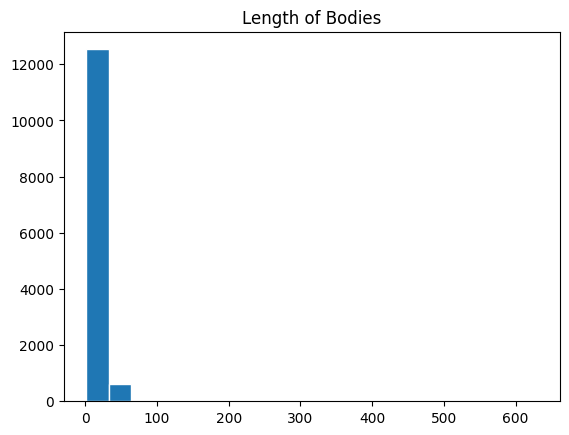

In [101]:
plt.hist(bodyLen, bins=20, ec='w')
plt.title("Length of Bodies")
plt.show()

In [82]:
print("There are", sum(bodyLen > 60), "bodies longer than 60 and", sum(bodyLen > 100), 'bodies longer than 100.')

There are 36 bodies longer than 60 and 9 bodies longer than 100.


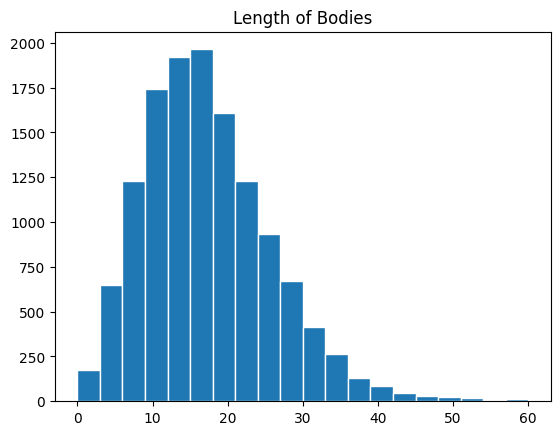

In [64]:
plt.hist(bodyLen, bins=20, ec='w', range=(0, 60))
plt.title("Length of Bodies")
plt.show()

In [80]:
over100 = list(bodyLen[bodyLen > 100].index)
data.loc[over100,]['body'].to_list()

['We want to try and see, if it’s actually possible to write sentences so long the length of its own is creepier than any story it could convey, though, I am not sure how well that story would look, not how readable it will be and yet, I am so tempted to attempt such thing, if only for the fun of it; but whether I will succeed or not is not the question of the length, but rather the very much unsettling feeling that will crawl into your bones as you read the seemingly never ending sentence which, hopefully, will be unnerving enough to scare off any readers that might look forward to the second sentence that might or might not ever come.\nNow watch if I got the sentences three.',
 '"We\'re too close t o    t       h       e              b              l                a                     c                   k                                       h       \n\no   \n\n\n\n\n\nl\n\n\n\n\n\n\n\n\n\n\ne',
 "I'm very scaed A heva nnnnnoooooooo Ideeeeeeeeeeeaaaaaaaaaaaaaa fo w\n             

After examining the above, we decided to remove all posts with bodies greater than 100. Some of these use non-typical spacing for emphasis, are announcements on the sub reddit, or are longer than two sentences.

In [81]:
data.drop(over100, axis=0)

,title,body
0,"""Sorry about the ultraviolets"" she said as she...","""Did you know"" I responded, ""The concept of us..."
1,"You, a tornado chaser, are looking at a tornad...","Then suddenly, it reverses direction."
2,"My daddy always told me ""If you got nothing go...","And as my abusive spouse screamed, bargained, ..."
3,They say that it takes a while for the pain of...,I’ve just been hit with a full spread of bucks...
4,My co-worker pranked me in the elevator by pre...,I watched in horror as the elevator screen cou...
...,...,...
13920,"""They don't exist, believe in that and no harm...",She assured me as a towering human torso on a ...
13921,I woke up shivering and my fingers and toes ti...,"The man standing above me said ""very good, we ..."
13922,"I was finishing a horror story, so I wrote 'Th...",NaN
13923,My four year old told me he wished people didn...,I told him about doorbells and he asked me to ...


## Deal with NaNs

In [87]:
print("There are", sum(data['title'].isna()), "NaNs in title, and", sum(data['body'].isna()), "NaNs in body.")

There are 0 NaNs in title, and 742 NaNs in body.


In [111]:
emptyBodies = data[data['body'].isna()]['title']
print(sum(emptyBodies.str.contains('\.')), "of the posts with empty bodies include a period in the title")

614 of the posts with empty bodies include a period in the title


In [202]:
titleSentLens = emptyBodies.str.split('.').apply(len)
print('Of those', sum(titleSentLens == 2), 'have exactly one period (i.e. two sentences).')

Of those 246 have exactly one period (i.e. two sentences).


In [146]:
data2 = data.drop(list(data[data['body'].isna()].index), axis=0) 

In [203]:
emptyBodiesSplit = emptyBodies.str.split('.')
# find the indices of posts with exactly two sentences
sentences = emptyBodiesSplit[emptyBodiesSplit.apply(len) == 2]
# separate the sentences
sent1 = sentences.apply(lambda x: x[0])
sent2 = sentences.apply(lambda x: x[1])
# check for empty sent2
# this occurs when there is only one sentence with a period at the end so splitting on a 
# period will return a list of length 2 but the second element is the empty string
# we also check for greater than length 1 in case the period is inside of a quote
print('There are', sum(sent2.apply(len) > 1), 'non-empty second sentences')

There are 103 non-empty second sentences


In [143]:
sent1 = sent1[sent2.apply(len) > 1]
sent2 = sent2[sent2.apply(len) > 1]

In [148]:
fixed_two_sent = pd.DataFrame({'title': sent1, 'body': sent2})

In [149]:
data = pd.concat([data2, fixed_two_sent], axis=0)

In [152]:
data = data.reset_index(drop = True)

,title,body
0,"""Sorry about the ultraviolets"" she said as she...","""Did you know"" I responded, ""The concept of us..."
1,"You, a tornado chaser, are looking at a tornad...","Then suddenly, it reverses direction."
2,"My daddy always told me ""If you got nothing go...","And as my abusive spouse screamed, bargained, ..."
3,They say that it takes a while for the pain of...,I’ve just been hit with a full spread of bucks...
4,My co-worker pranked me in the elevator by pre...,I watched in horror as the elevator screen cou...
...,...,...
13281,"It was beautiful outside today, so I went for ...",without warning the geometry changed
13282,"Leaving the store, the strange man smiled and ...",She knew it wasn't a compliment
13283,You hear your phone ding and look down at a text,You read “message from Illuminati man: ‘we’re...
13284,I look at my mom standing in front of my bed s...,my mom died 8years ago


## Wor(l)d Cloud

In [ ]:
# convert the dataframe to a string 
biiig_string = np.sum(np.sum(data))

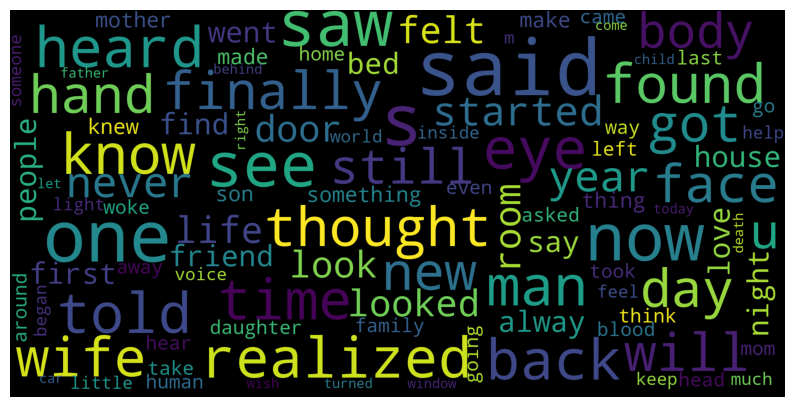

In [171]:
wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(biiig_string)

fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.subplots_adjust(top=2.3)
plt.imshow(wordcloud)
plt.show()

## Modeling

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf.fit([biiig_string])

{'sorry': 18119,
 'about': 505,
 'the': 19591,
 'ultraviolets': 20482,
 'she': 17296,
 'said': 16629,
 'as': 1489,
 'walked': 21284,
 'room': 16441,
 'to': 19895,
 'switching': 19206,
 'on': 13550,
 'lights': 11420,
 'it': 10566,
 'only': 13573,
 'way': 21430,
 'know': 11014,
 'you': 22084,
 'tornado': 20014,
 'chaser': 3553,
 'are': 1398,
 'looking': 11602,
 'at': 1583,
 'that': 19581,
 'is': 10546,
 'moving': 12784,
 'away': 1725,
 'from': 8127,
 'my': 12908,
 'daddy': 5012,
 'always': 1030,
 'told': 19943,
 'me': 12088,
 'if': 9948,
 'got': 8649,
 'nothing': 13289,
 'good': 8617,
 'say': 16779,
 'then': 19620,
 'don': 5985,
 'anything': 1253,
 'they': 19654,
 'takes': 19290,
 'while': 21578,
 'for': 7899,
 'pain': 13885,
 'of': 13471,
 'being': 2151,
 'shot': 17425,
 'hit': 9514,
 'but': 3044,
 'hurts': 9850,
 'like': 11422,
 'devil': 5551,
 'co': 4018,
 'worker': 21858,
 'pranked': 14888,
 'in': 10084,
 'elevator': 6516,
 'by': 3076,
 'pressing': 14976,
 'all': 955,
 'buttons': 306

In [176]:
print('There are', len(tfidf.vocabulary_.keys()), 'unique words in the', len(biiig_string), 'total words in the posts.')

There are 22208 unique words in the 2260585 total words in the posts.


We will use BERT (or some variation thereof) on [HuggingFace](https://huggingface.co/docs/transformers/v4.27.2/en/model_doc/bert#transformers.BertForQuestionAnswering).

We plan to feed in the "title" or first sentence to the model and have it generate the second sentence (aka "body").